In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import json
import os
import collections
import matplotlib.pyplot as plt
from pathlib import Path

# Plotting FIDs

In [2]:
## Just loading the fids
# location = "/usrhomes/g013/SemanticStyleGAN/fids/fids_v1.json"
# print(location)
# f = open(location)
# fids = json.load(f)
# print(fids)

In [3]:
#Funcrtiomn to sort a dictionary either based on keys or values
def save_sorted(location,sort_keys=True) -> dict:
    f = open(location)
    fids = json.load(f)
   
    if sort_keys:
        sorted_fids = sorted(fids.items(), key=lambda kv: kv[0])
    else:
        sorted_fids = sorted(fids.items(), key=lambda kv: kv[1])
    sorted_fids=collections.OrderedDict(sorted_fids)
   
    with open(location, 'w') as fp:
        json.dump(sorted_fids, fp)
    return sorted_fids

In [4]:
def plot_fids(location,save=False):
    sorted_fids=save_sorted(location,sort_keys=True)
    x_keys = np.fromiter(sorted_fids.keys(),dtype=float)/1000
    y_values = np.fromiter(sorted_fids.values(),dtype=float)
    plt.plot(x_keys,y_values)
    plt.yticks(np.arange(min(y_values),max(y_values),20))
    plt.xlabel("Iterations in Thousand")
    plt.ylabel("FID Values")
    plt.xticks(rotation='vertical')
    if save:
            location =Path(location)
            plt.savefig(str(location.parent/location.stem)+".png", bbox_inches='tight')
    else:
            plt.show()
    min_key = x_keys[np.where(y_values == np.amin(y_values))[0]][0]
    print(f" Minimum FID is {min(y_values)} at iteration {min_key}k")



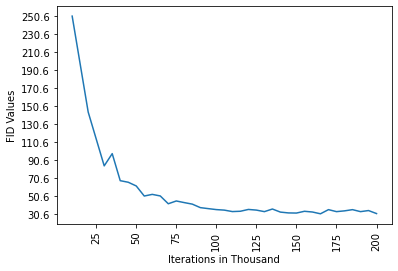

 Minimum FID is 30.62 at iteration 165.0k


In [5]:
location = "/usrhomes/g013/SemanticStyleGAN/fids/fids_v1.json"
plot_fids(location,save=False)

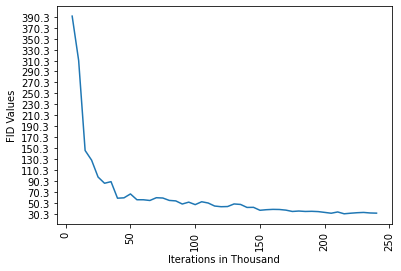

 Minimum FID is 30.31 at iteration 215.0k


In [6]:
location = "/usrhomes/g013/SemanticStyleGAN/fids/fids_v2.json"
plot_fids(location,save=False)

 Minimum FID is 51.08 at iteration 45.0k


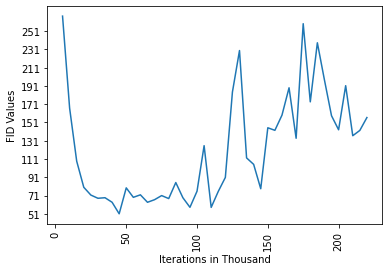

In [7]:
location = "/usrhomes/g013/SemanticStyleGAN/fids/fids_v3.json"
plot_fids(location,save=True)

 Minimum FID is 50.96 at iteration 40.0k


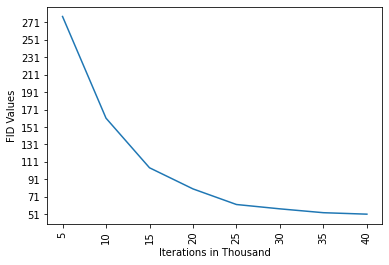

In [5]:
location = "/usrhomes/g013/SemanticStyleGAN/fids/fids_v3_2.json"
plot_fids(location,save=True)

 Minimum FID is 47.62 at iteration 55.0k


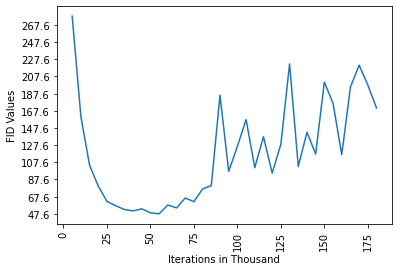

In [5]:
location = "/usrhomes/g013/SemanticStyleGAN/fids/fids_v3_no_test.json"
plot_fids(location,save=True)

 Minimum FID is 36.66 at iteration 35.0k


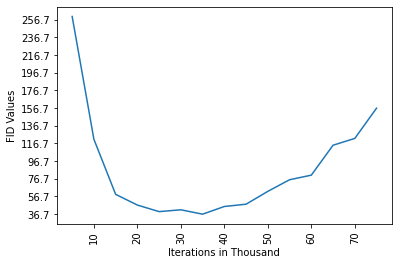

In [5]:
# First Implementation of 16 Local G
location = "../fids/fids_v3.3.json"
plot_fids(location,save=True)

 Minimum FID is 34.6 at iteration 55.0k


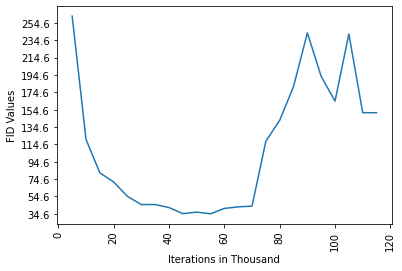

In [5]:
#Spectral norm only to first conv layer
location = "../fids/fids_v3.4.json"
plot_fids(location,save=True)

 Minimum FID is 40.05 at iteration 50.0k


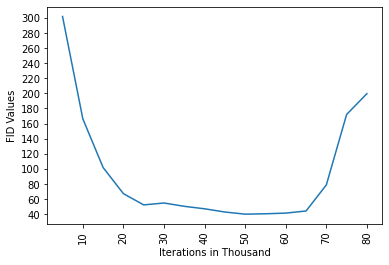

In [5]:
#Adding spectral norm to Main conv Layers
location = "../fids/fids_v3.5.json"
plot_fids(location,save=True)

 Minimum FID is 43.28 at iteration 50.0k


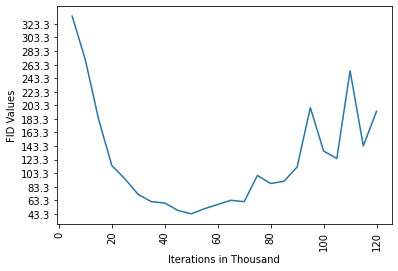

In [5]:
#Adding spectral norm to Main conv Layers
location = "../fids/fids_v3.5_2.json"
plot_fids(location,save=True)

 Minimum FID is 21.39 at iteration 65.0k


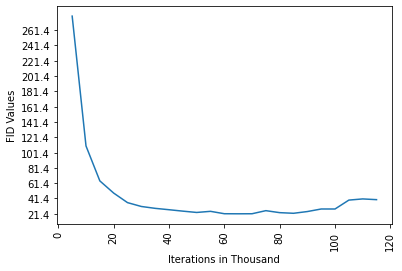

In [5]:
#Bigger Batch size (12 on 3 diff GPUs)
location = "../fids/fids_v3.7.json"
plot_fids(location,save=True)